# Perceptron Model with Iris Dataset


This notebook to train on how to build and train a Perceptron model using the Iris dataset. The Iris dataset is a classic dataset used in machine learning and statistics, consisting of 150 samples of iris flowers with four features each (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).

In this notebook, we will do the following:
* Load and prepare the Iris dataset.
* Split the dataset into training and testing sets.
* Standardize the features.
* Train a Perceptron model.
* Evaluate the model's performance.


# Import libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# EDA

In [84]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [85]:
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

iris_df['target'] = iris_data.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [87]:
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [88]:
iris_df.duplicated().sum()

1

In [89]:
iris_df.drop_duplicates(inplace=True)

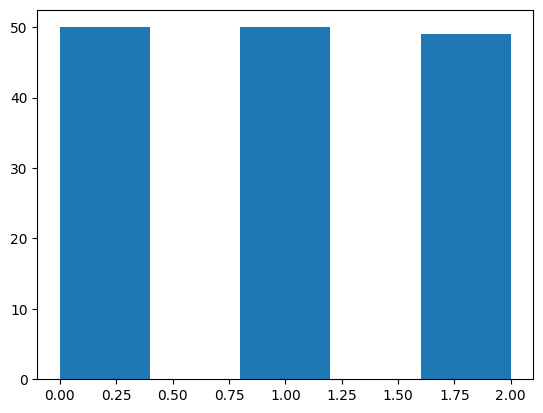

In [90]:
plt.hist(iris_df['target'], bins=5)
plt.show()

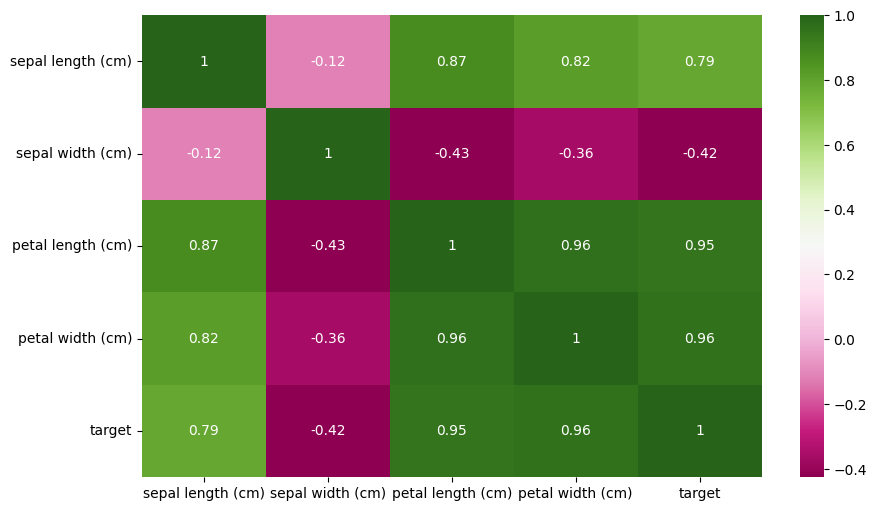

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='PiYG')
plt.show()

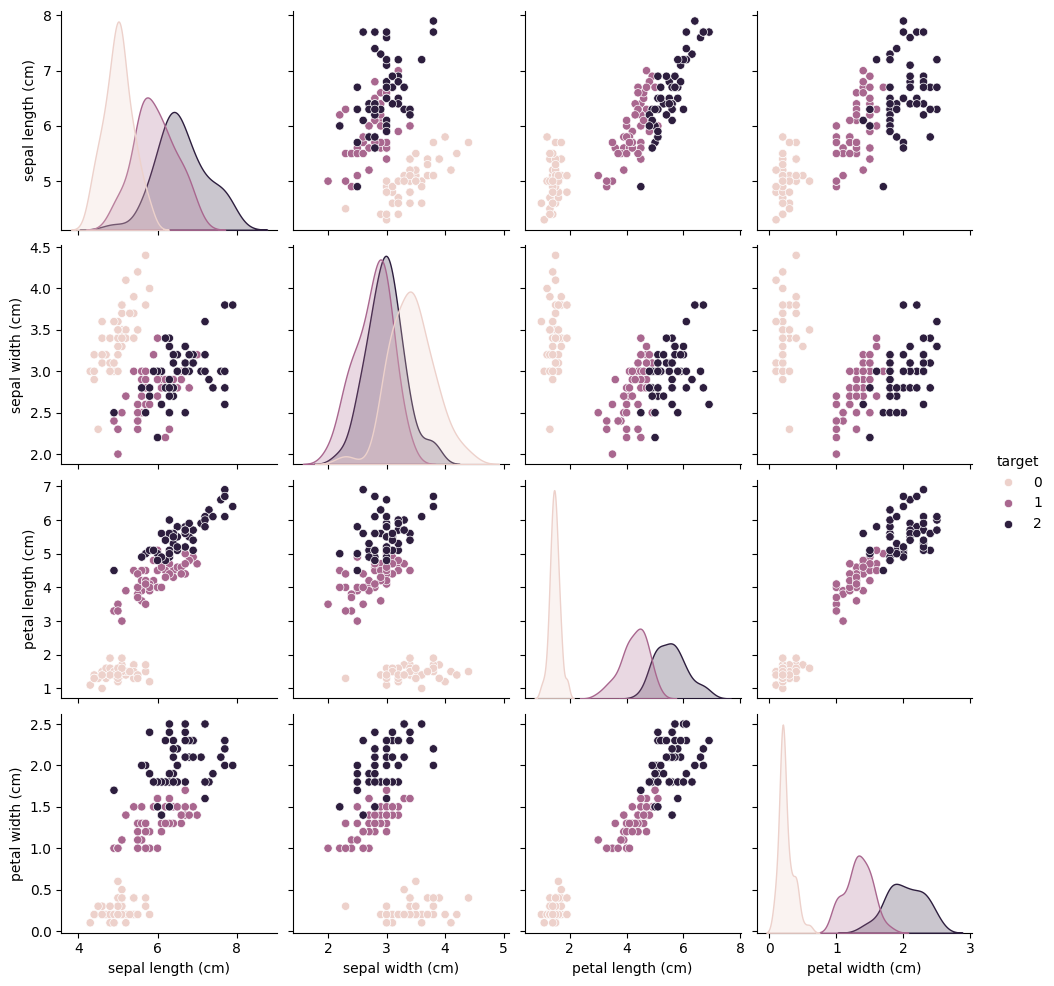

In [92]:
sns.pairplot(iris_df, hue='target')
plt.show()

# Split the dataset into training and testing sets

In [93]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Standardize the features

In [94]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Perceptron model

In [96]:
my_perceptron = Perceptron(max_iter=20, tol=1e-3, random_state=0 , penalty='l1')

history = my_perceptron.fit(X_train, y_train)

# Predict the labels of the test set

In [97]:
y_pred = my_perceptron.predict(X_test)

print("Predicted labels for the test set:")
print(y_pred)

Predicted labels for the test set:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 1 2 2 2 1 0 0]


In [98]:
print('The number of wrong classified sample :', (y_test != y_pred).sum())
print('The accuracy of Perceptron : %.2f' %((y_test == y_pred).sum() / len(y_test)))

The number of wrong classified sample : 3
The accuracy of Perceptron : 0.90


# Calculate the accuracy of the model

In [99]:
accuracy_res = accuracy_score(y_test, y_pred)

print(f"The accuracy results: {accuracy_res * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=iris_data.target_names))

The accuracy results: 90.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



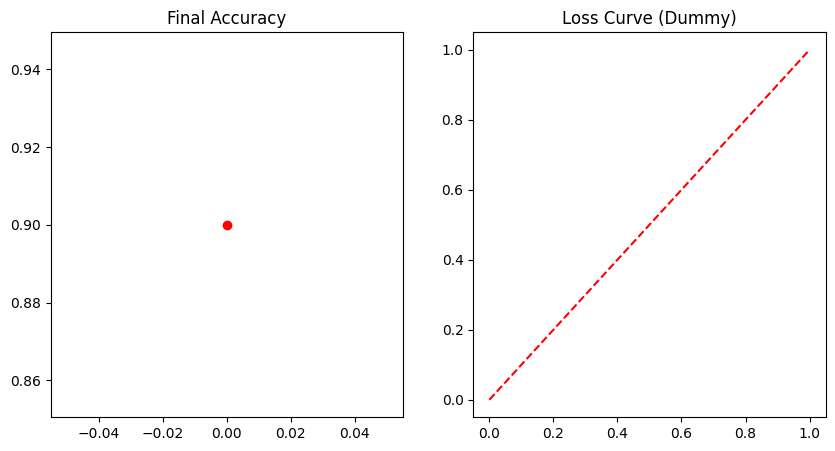

In [100]:
# Since Perceptron doesn't track loss over iterations, we only plot final accuracy
plt.figure(figsize=(10, 5))

# Plotting accuracy (for demonstration)
plt.subplot(1, 2, 1)
plt.plot([accuracy_res], 'ro', label='Accuracy')
plt.title('Final Accuracy')


# Since loss curve is not available, plotting a dummy curve
plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], 'r--', label='Loss (Dummy)')
plt.title('Loss Curve (Dummy)')

plt.show()

# Display the first few predictions

In [101]:
# Display the first few predictions
print('First few predictions:\n')
for i in range(5):
    print(f'Sample {i+1}: Predicted={iris_data.target_names[y_pred[i]]}, Actual={iris_data.target_names[y_test.iloc[i]]}')

First few predictions:

Sample 1: Predicted=versicolor, Actual=versicolor
Sample 2: Predicted=setosa, Actual=setosa
Sample 3: Predicted=virginica, Actual=virginica
Sample 4: Predicted=versicolor, Actual=versicolor
Sample 5: Predicted=versicolor, Actual=versicolor
